In [1]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
from modules import local_eb_kernel as rk
from scipy.integrate import quad

%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
nside=16 ; ell=arange(3*nside+1)
beta0=min(180,180*24./(3.*nside)) ; xsize=400 ; reso=1.5*beta0*60./xsize
betafull=180.
y=rk.real_space_queb_kernels(nside,tmax=betafull,maxlmax=3*nside,sampling=2500)

In [3]:
lmin=2 ; lmax=3*nside 
fl=ones(3*nside+1,float)
fl[:lmin]=0 ; fl[lmax+1:]=0

y.calc_qu2eb_rad_kernel(lmax,lmin)
y.calc_qu2queb_rad_kernel(lmax,lmin)
y.setup_fn_rad_ker()

In [5]:
upnside=nside
npix=h.nside2npix(upnside)

In [97]:
cpix=100
theta0=10. ; phi0=0.
cpix=h.ang2pix(upnside,theta0*pi/180.,phi0*pi/180.)
theta,phi=h.pix2ang(upnside,cpix)
theta=theta*180./pi ; phi=phi*180/pi ; print theta,phi

tqu=[zeros(npix,float),zeros(npix,float),zeros(npix,float)] ; tqu[1][cpix]=1.
alm=h.map2alm(tqu,lmax=lmax,pol=True) ; alm=[h.almxfl(alm[i],fl,inplace=True) for i in arange(3)]
rtquq=h.alm2map(alm,upnside,pol=True)
tebq=h.alm2map(alm,upnside,pol=False)
alm=h.map2alm(tqu,lmax=lmax,pol=True) ; alm=[h.almxfl(alm[i],fl,inplace=True) for i in arange(3)]
alm[2][:]=0. ; equq=h.alm2map(alm,upnside,pol=True)
alm=h.map2alm(tqu,lmax=lmax,pol=True) ; alm=[h.almxfl(alm[i],fl,inplace=True) for i in arange(3)]
alm[1][:]=0. ; bquq=h.alm2map(alm,upnside,pol=True)

tqu=[zeros(npix,float),zeros(npix,float),zeros(npix,float)] ; tqu[2][cpix]=1.
alm=h.map2alm(tqu,lmax=lmax,pol=True) ; alm=[h.almxfl(alm[i],fl,inplace=True) for i in arange(3)]
rtquu=h.alm2map(alm,upnside,pol=True)
tebu=h.alm2map(alm,upnside,pol=False)
alm=h.map2alm(tqu,lmax=lmax,pol=True) ; alm=[h.almxfl(alm[i],fl,inplace=True) for i in arange(3)]
alm[2][:]=0. ; equu=h.alm2map(alm,upnside,pol=True)
alm=h.map2alm(tqu,lmax=lmax,pol=True) ; alm=[h.almxfl(alm[i],fl,inplace=True) for i in arange(3)]
alm[1][:]=0. ; bquu=h.alm2map(alm,upnside,pol=True)

10.2471720653 6.42857142857
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [98]:
# make plots of Mr and Mi
mr=zeros(npix,float) ; mi=zeros(npix,float)
mrp=zeros(npix,float) ; mip=zeros(npix,float)
alpha=zeros(npix,float) ; beta=zeros(npix,float) ; gamma=zeros(npix,float)
Ir=zeros(npix,float) ; Ii=zeros(npix,float)
Jr=zeros(npix,float) ; Ji=zeros(npix,float)

norm=(nside**2.)/(upnside**2.) ; print norm
a,b,g,pix2=y.return_euler_angles(upnside,cpix,betafull)
mr[pix2]=cos(2.*a)*y.fn_rad_ker(b)*norm ; mi[pix2]=sin(2.*a)*y.fn_rad_ker(b)*norm
mrp[pix2]=cos(2.*a)*y.fn_rad_ker(b)*norm ; mip[pix2]=sin(2.*a)*y.fn_rad_ker(b)*norm
#mr[pix2]=cos(2.*a)*y.fn_rad_ker(b) ; mi[pix2]=sin(2.*a)*y.fn_rad_ker(b)
Ir[pix2]=0.5*cos(2.*(a+g))*y.fn_rad_ker_m2(b)*norm ; Ii[pix2]=0.5*sin(2.*(a+g))*y.fn_rad_ker_m2(b)*norm
Jr[pix2]=0.5*cos(2.*(a-g))*y.fn_rad_ker_p2(b)*norm ; Ji[pix2]=0.5*sin(2.*(a-g))*y.fn_rad_ker_p2(b)*norm



alpha[pix2]=a
beta[pix2]=b
gamma[pix2]=g

0.25


<IPython.core.display.Javascript object>


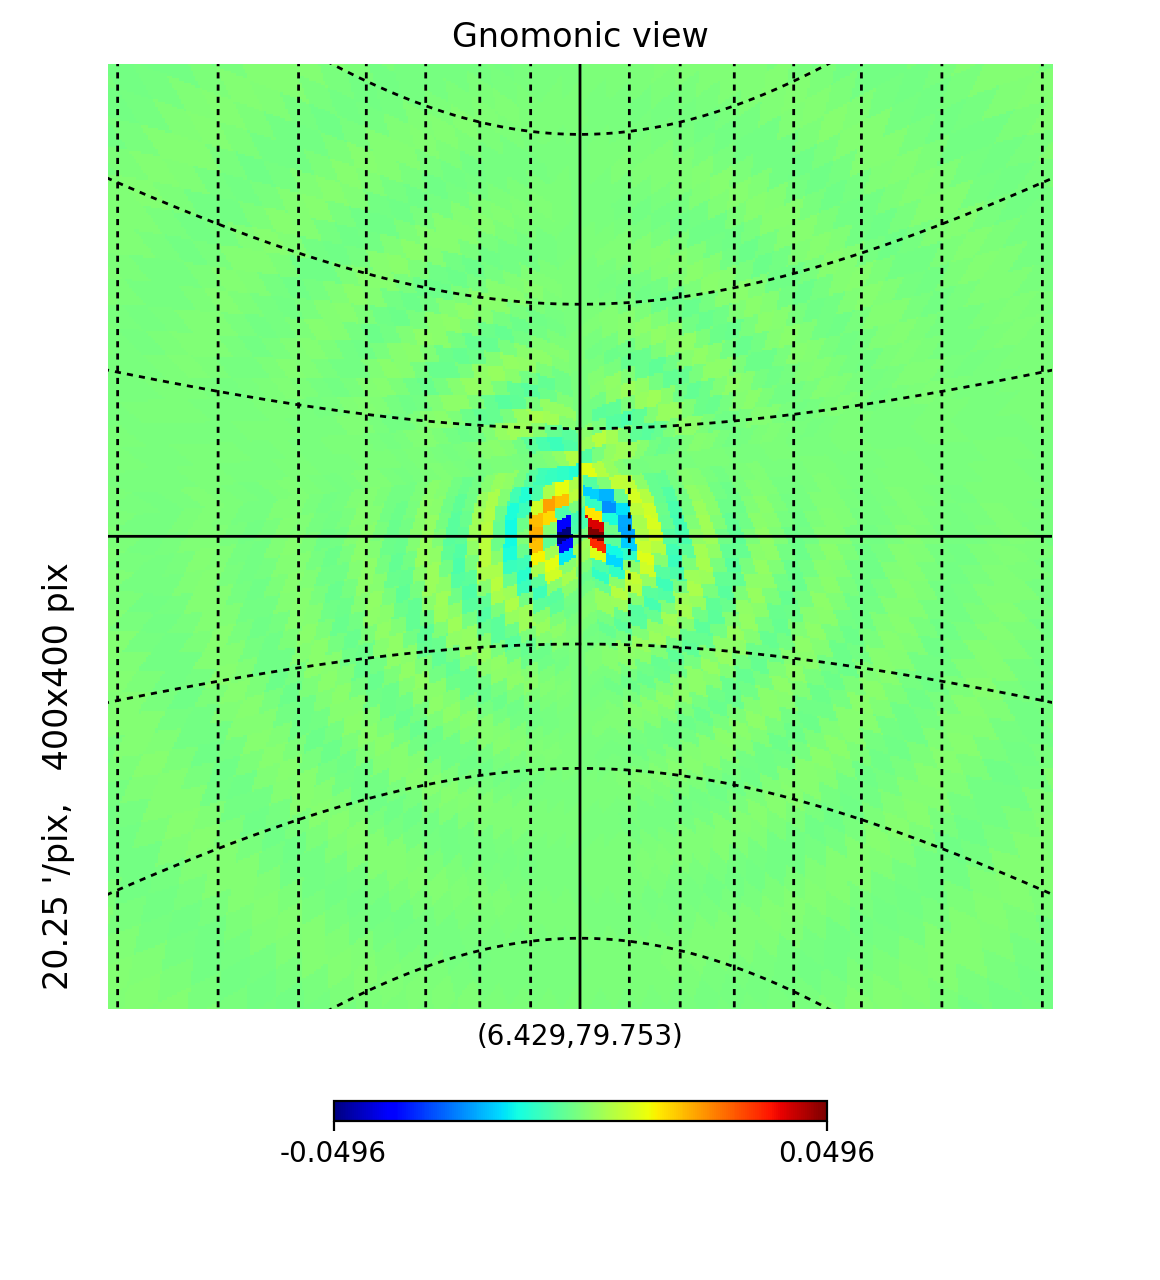

31.035960487 148.964039513 -58.964039513 58.964039513
The interval between parallels is 15 deg -0.00'.
The interval between meridians is 7 deg 0.00'.


<IPython.core.display.Javascript object>


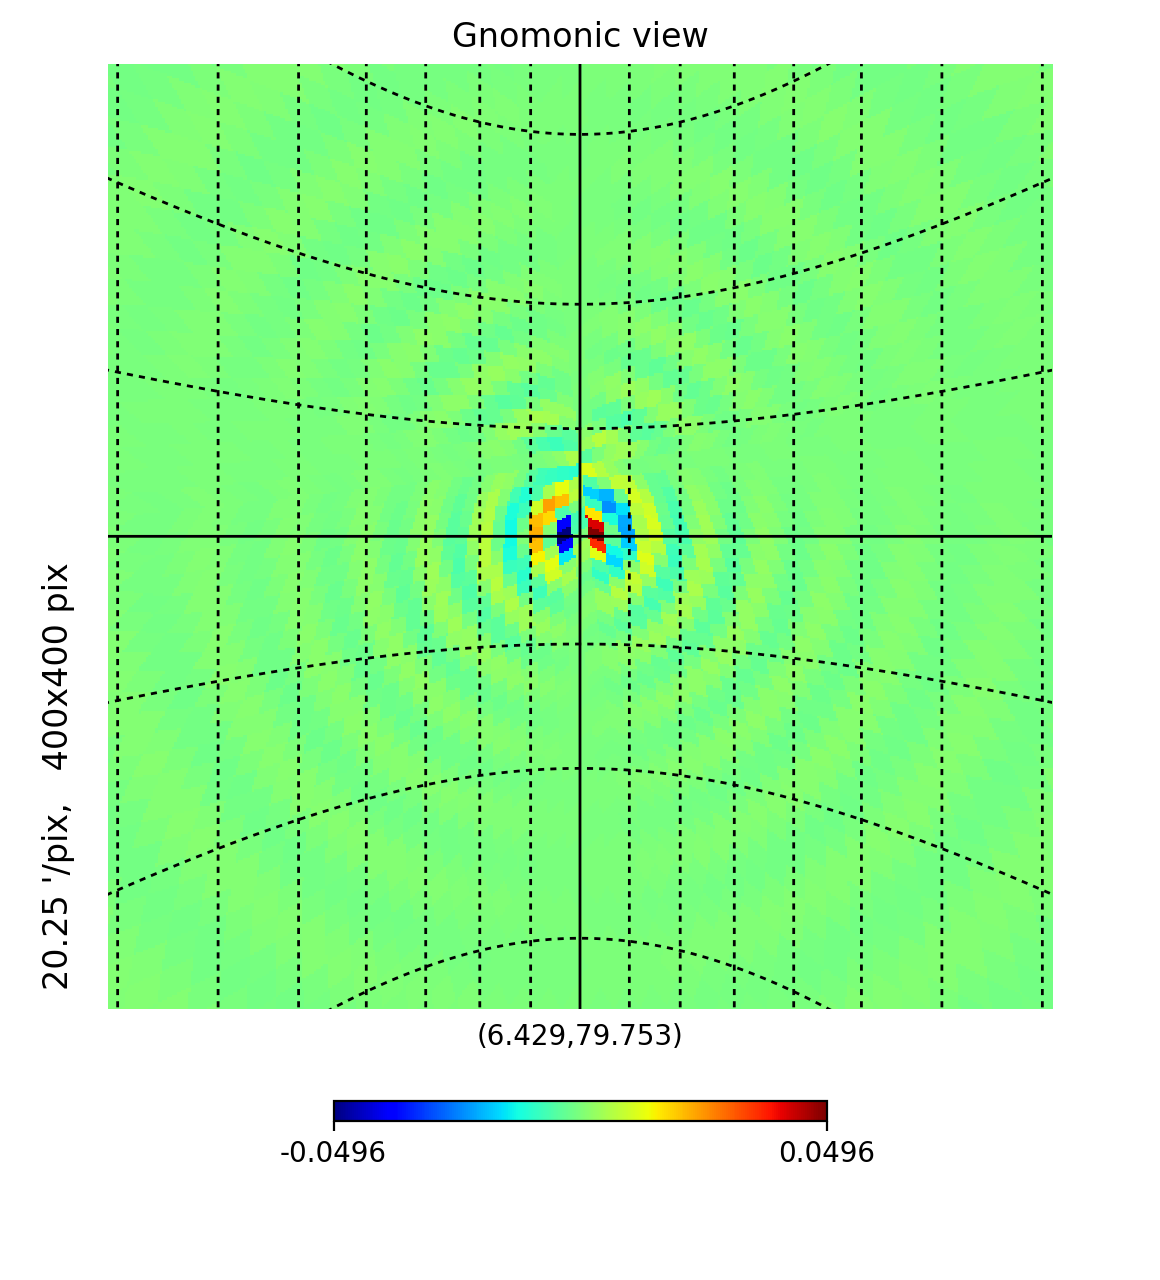

31.035960487 148.964039513 -58.964039513 58.964039513
The interval between parallels is 15 deg -0.00'.
The interval between meridians is 7 deg 0.00'.


<IPython.core.display.Javascript object>


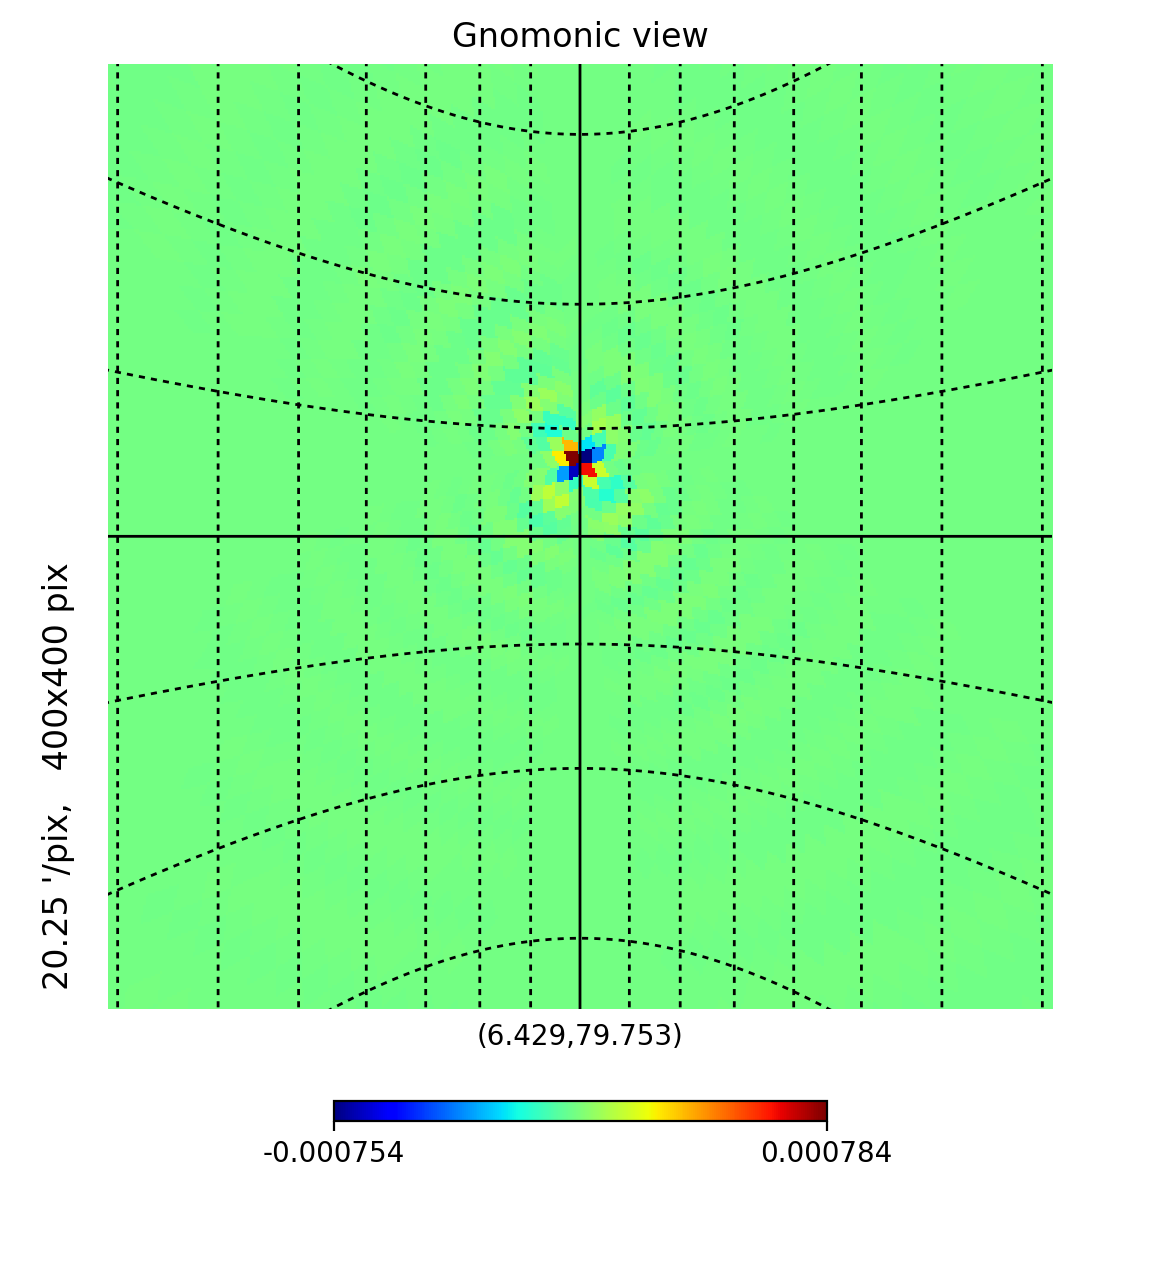

31.035960487 148.964039513 -58.964039513 58.964039513
The interval between parallels is 15 deg -0.00'.
The interval between meridians is 7 deg 0.00'.


In [99]:
h.gnomview(rtquq[2],rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()
h.gnomview(Ii*2,rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()
h.gnomview(rtquq[2]-Ii*2,rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()

In [135]:
#wpix=8000
#print alpha[pix2==wpix]*180./pi,beta[pix2==wpix]*180./pi
#print mr[wpix]*sqrt(4.*pi/(2.*lmin+1))/y.omega,-tebq[1][wpix]*sqrt(4.*pi/(2.*lmin+1))

#theta=linspace(0.,pi,10000)
#phi=zeros(theta.size,float)
#p=h.ang2pix(upnside,theta,phi)
#rtheta,rphi=h.pix2ang(upnside,p)

#figure()
#plot(theta*180./pi,-tebq[1][p])
#plot(y.theta*180./pi,y.fn_rad_ker(y.theta),"--")
#ylim(-4e-4,4e-4)

<IPython.core.display.Javascript object>


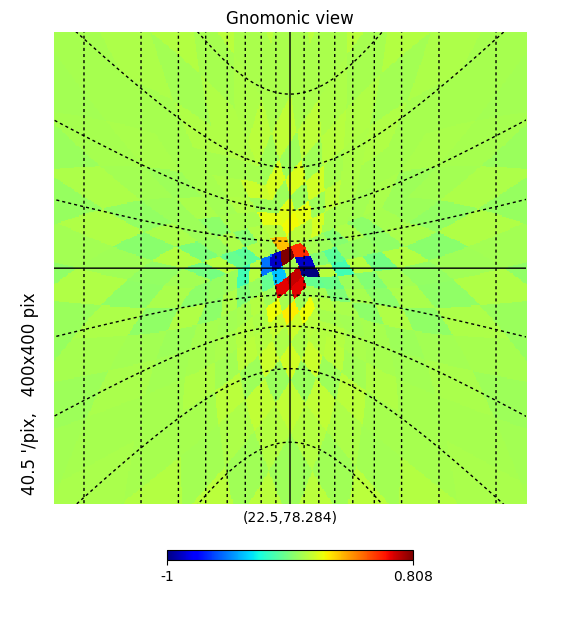

16.7443123651 163.255687635 -73.2556876349 73.2556876349
The interval between parallels is 15 deg -0.00'.
The interval between meridians is 8 deg 0.00'.


<IPython.core.display.Javascript object>


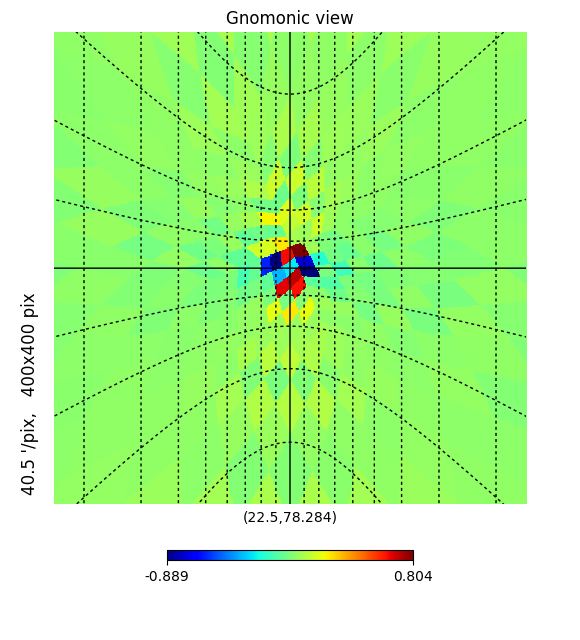

16.7443123651 163.255687635 -73.2556876349 73.2556876349
The interval between parallels is 15 deg -0.00'.
The interval between meridians is 8 deg 0.00'.


In [136]:
norm=max(abs(mr))
h.gnomview(mr/norm,rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()
h.gnomview(-tebq[1]/norm,rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()

<IPython.core.display.Javascript object>


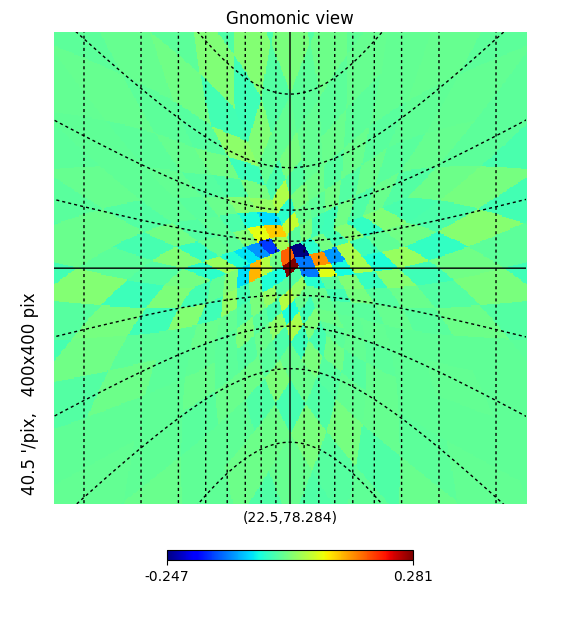

16.7443123651 163.255687635 -73.2556876349 73.2556876349
The interval between parallels is 15 deg -0.00'.
The interval between meridians is 8 deg 0.00'.


<IPython.core.display.Javascript object>


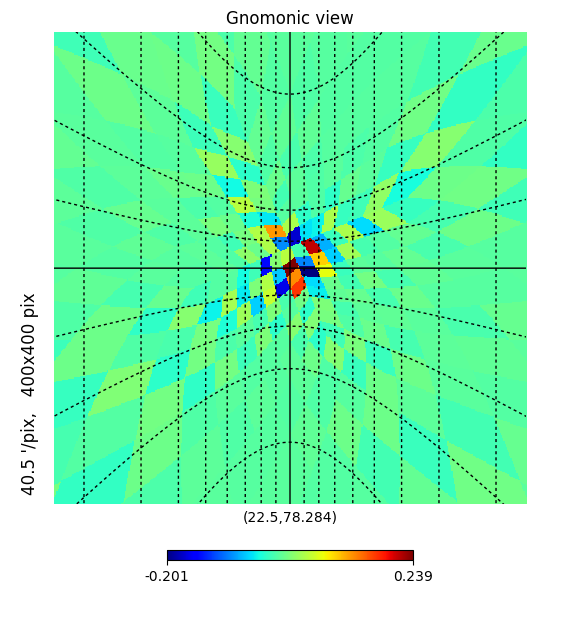

16.7443123651 163.255687635 -73.2556876349 73.2556876349
The interval between parallels is 15 deg -0.00'.
The interval between meridians is 8 deg 0.00'.


In [137]:
h.gnomview((mr+tebq[1])/norm,rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()
h.gnomview((mi+tebq[2])/norm,rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()

<IPython.core.display.Javascript object>


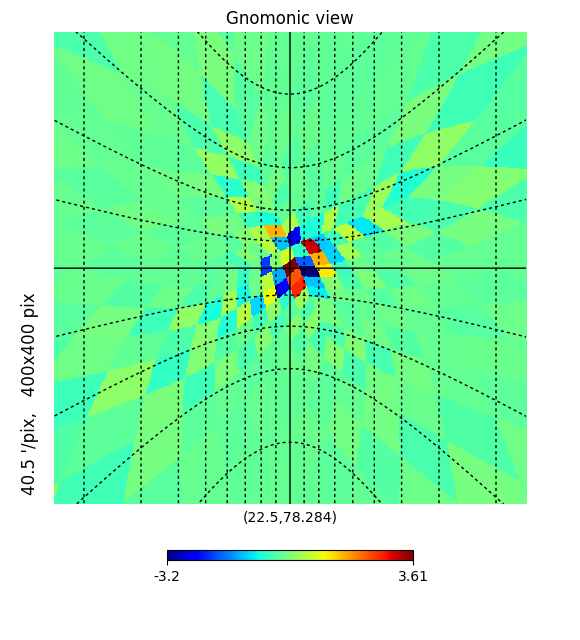

16.7443123651 163.255687635 -73.2556876349 73.2556876349
The interval between parallels is 15 deg -0.00'.
The interval between meridians is 8 deg 0.00'.


<IPython.core.display.Javascript object>


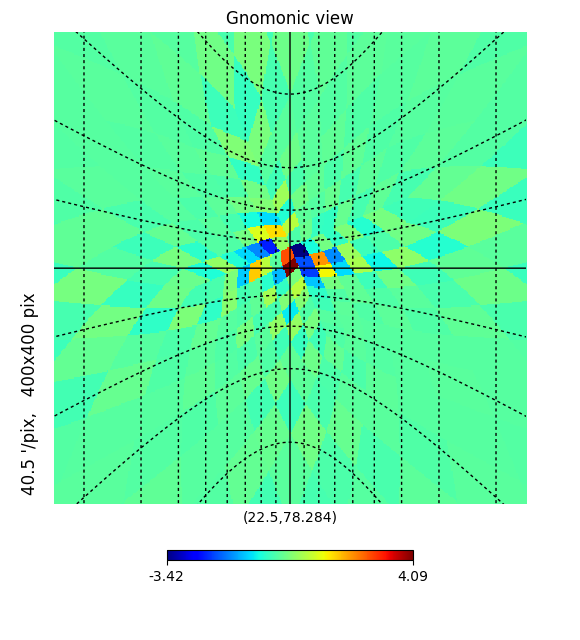

16.7443123651 163.255687635 -73.2556876349 73.2556876349
The interval between parallels is 15 deg -0.00'.
The interval between meridians is 8 deg 0.00'.


In [138]:
h.gnomview((mi-tebu[1])/0.018,rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()
h.gnomview((mr+tebu[2])/0.018,rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()

<IPython.core.display.Javascript object>


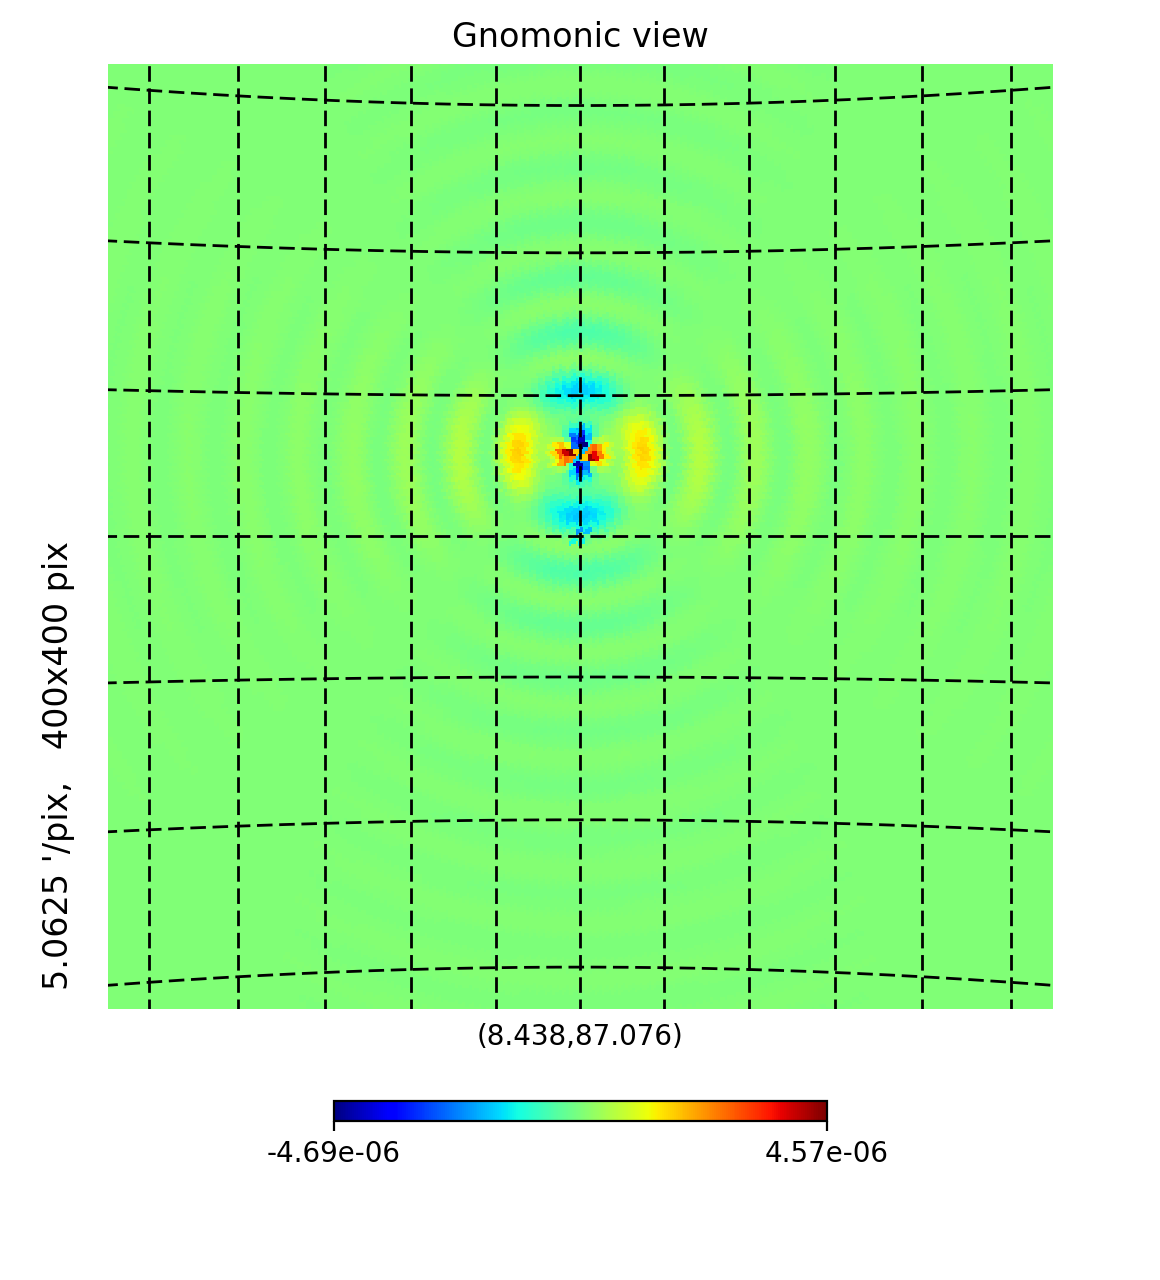

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


<IPython.core.display.Javascript object>


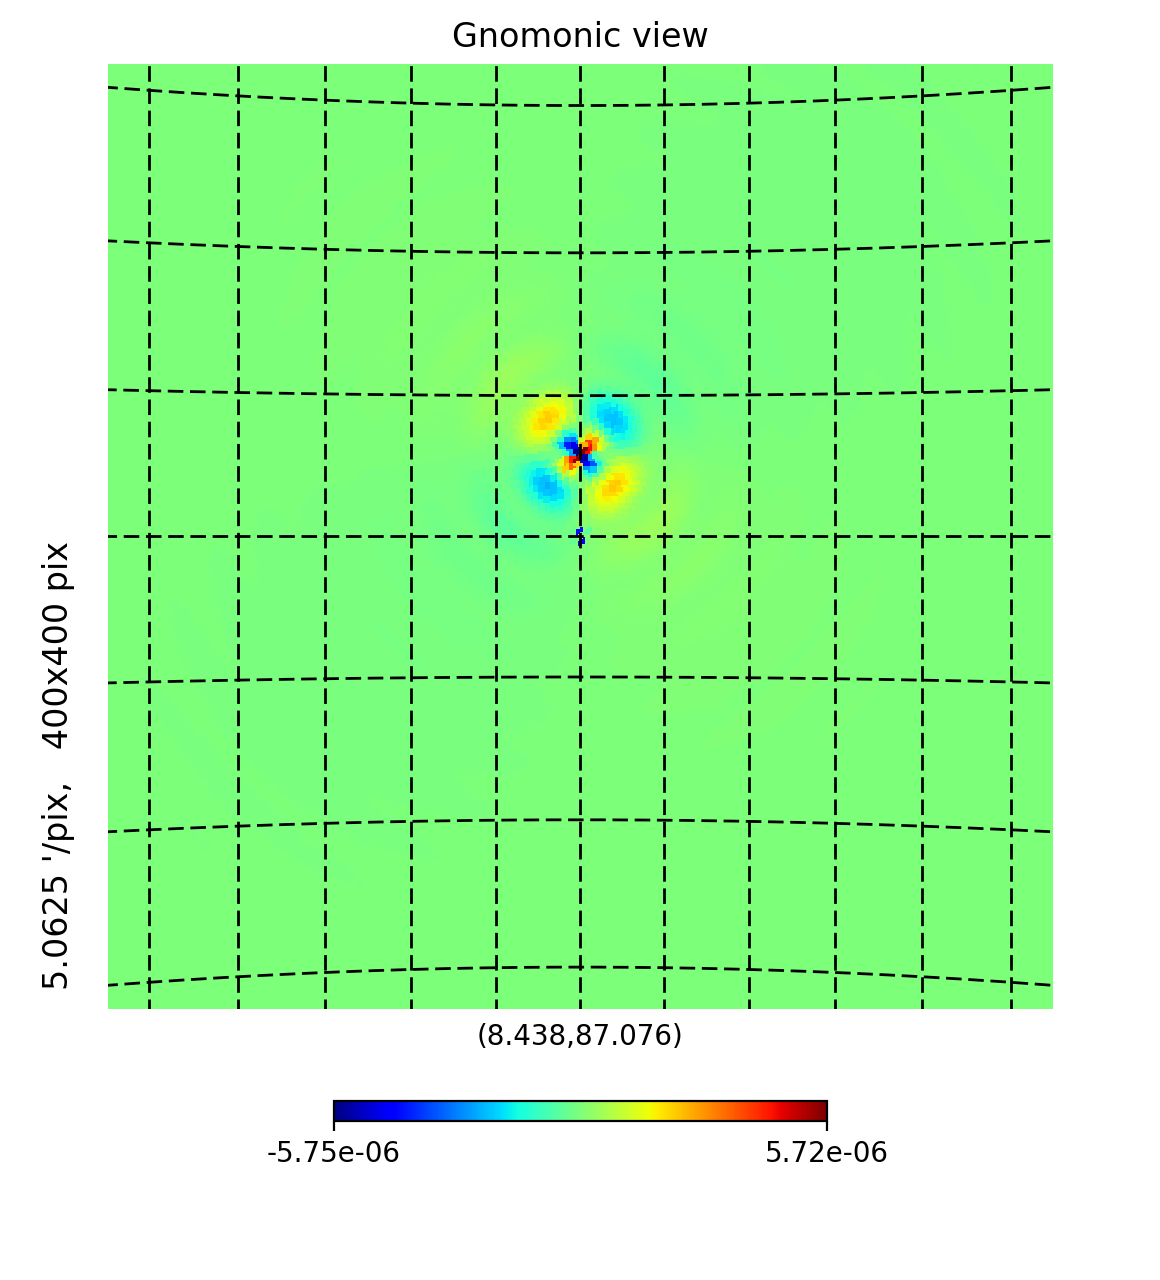

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


In [61]:
h.gnomview((Ir+Jr)-equq[1],rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule(linestyle="dashed")
h.gnomview((Ii-Ji)-equq[2],rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule(linestyle="dashed")

<IPython.core.display.Javascript object>


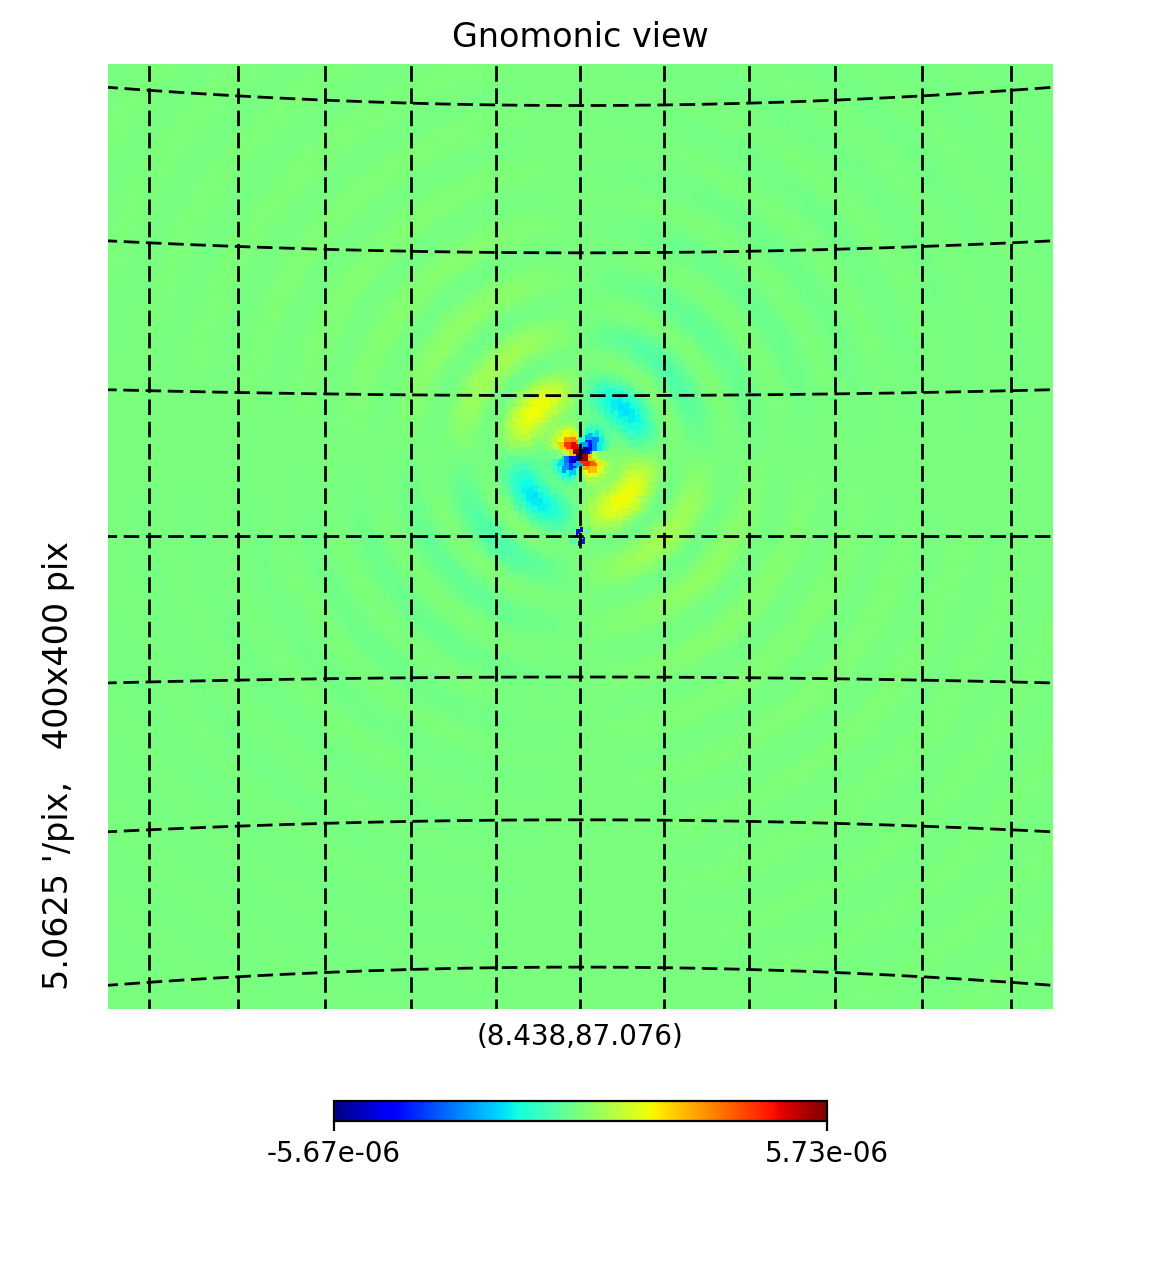

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


<IPython.core.display.Javascript object>


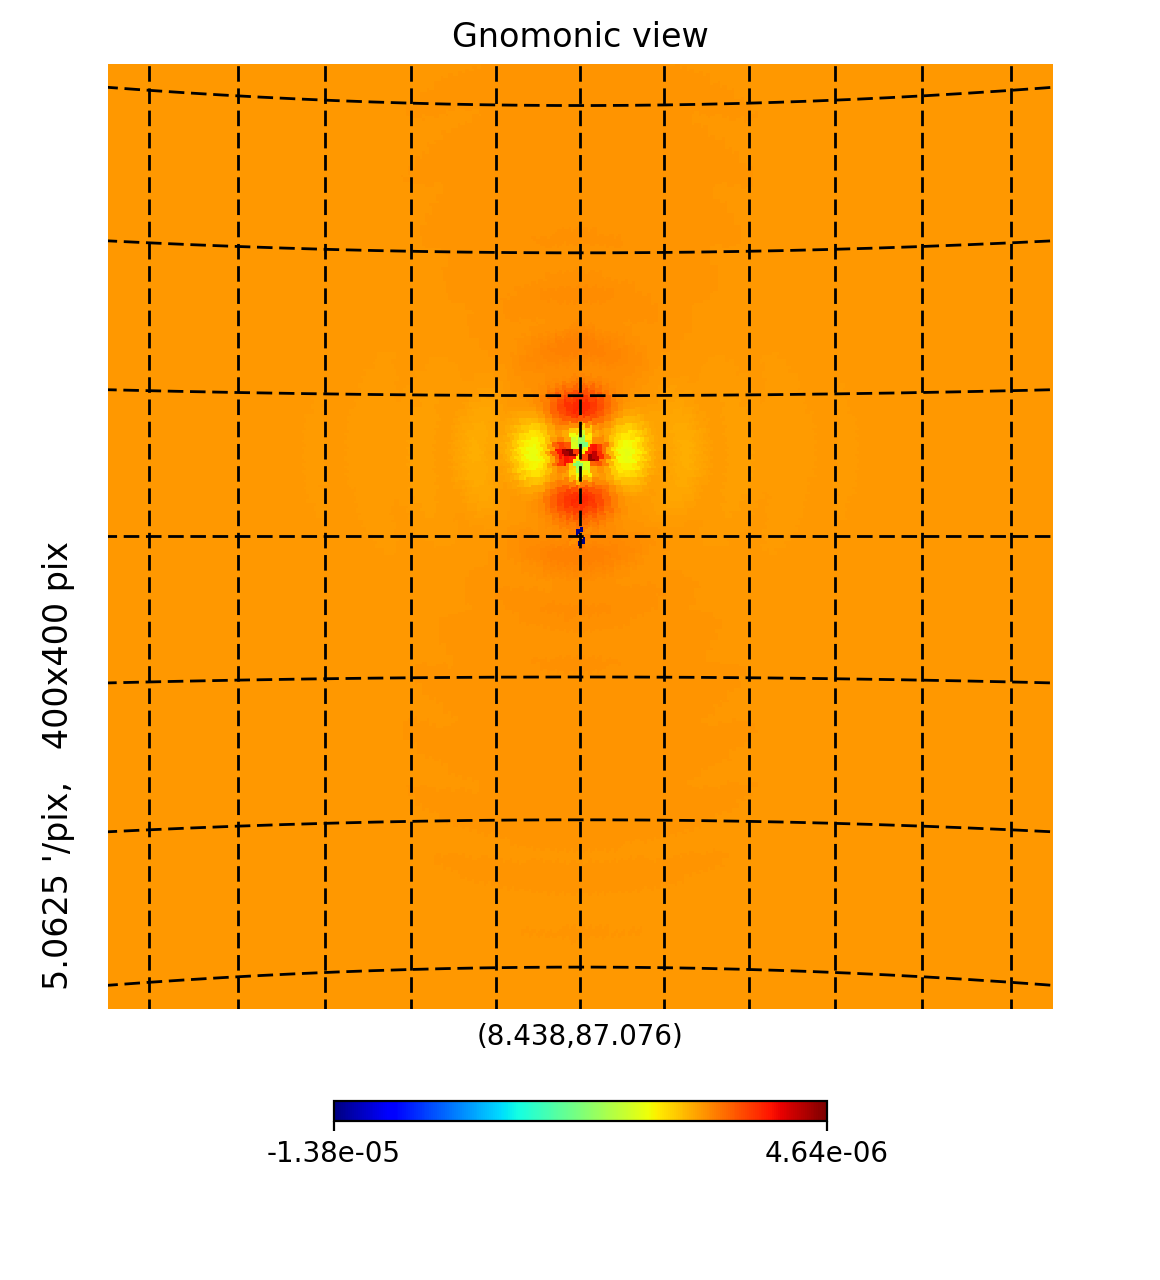

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


In [62]:
h.gnomview((-Ii-Ji)-equu[1],rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule(linestyle="dashed")
h.gnomview((Ir-Jr)-equu[2],rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule(linestyle="dashed")

<IPython.core.display.Javascript object>


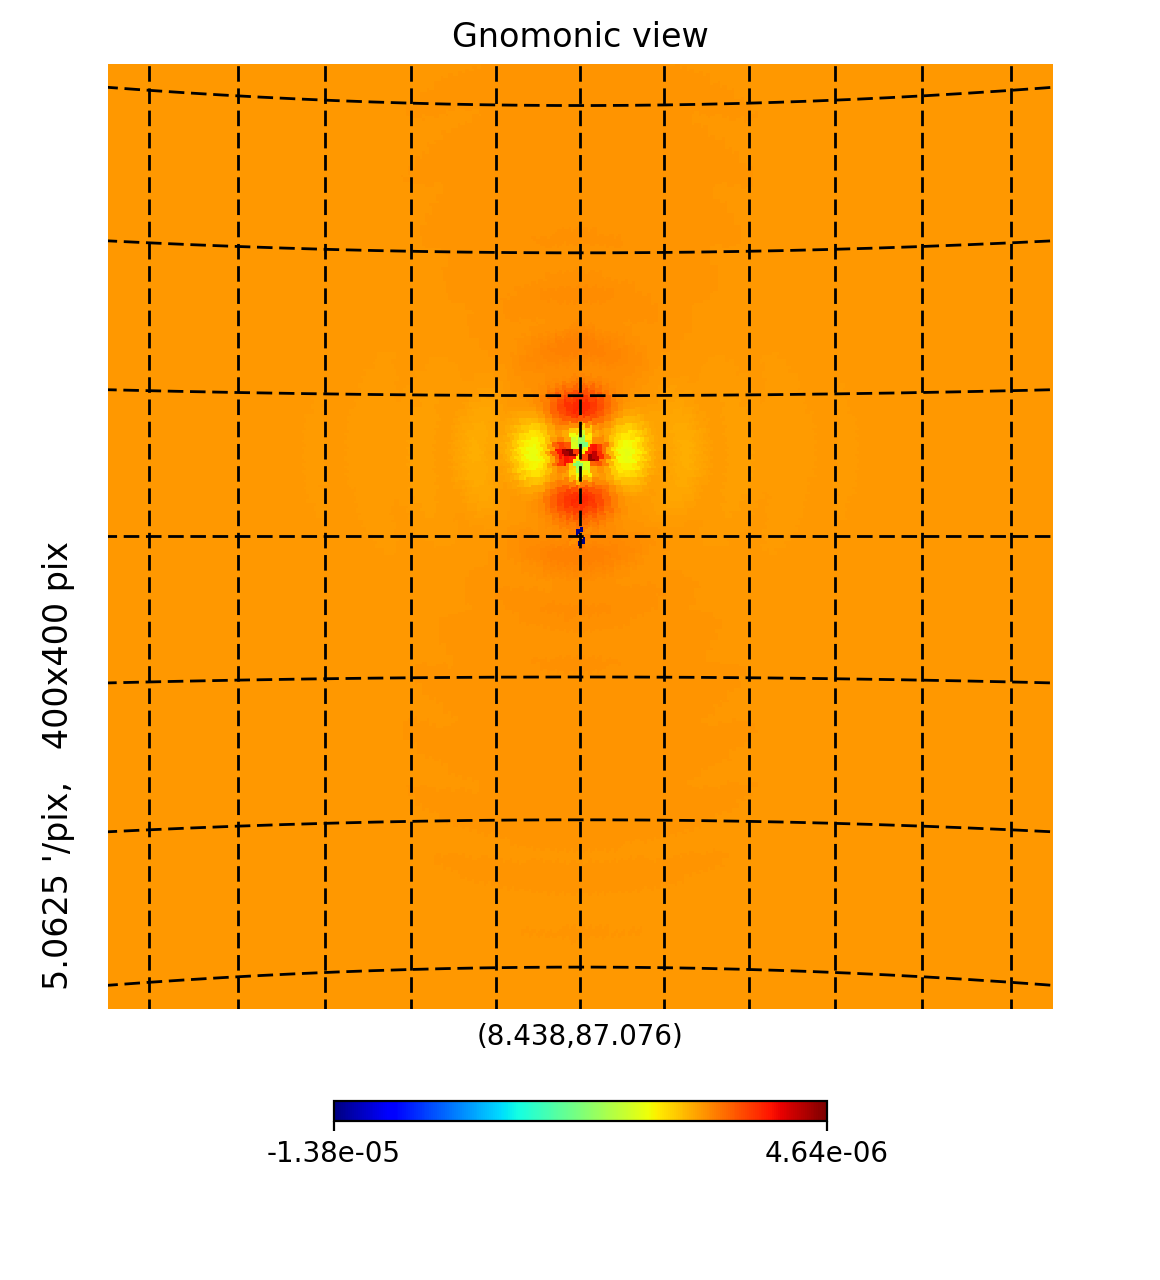

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


<IPython.core.display.Javascript object>


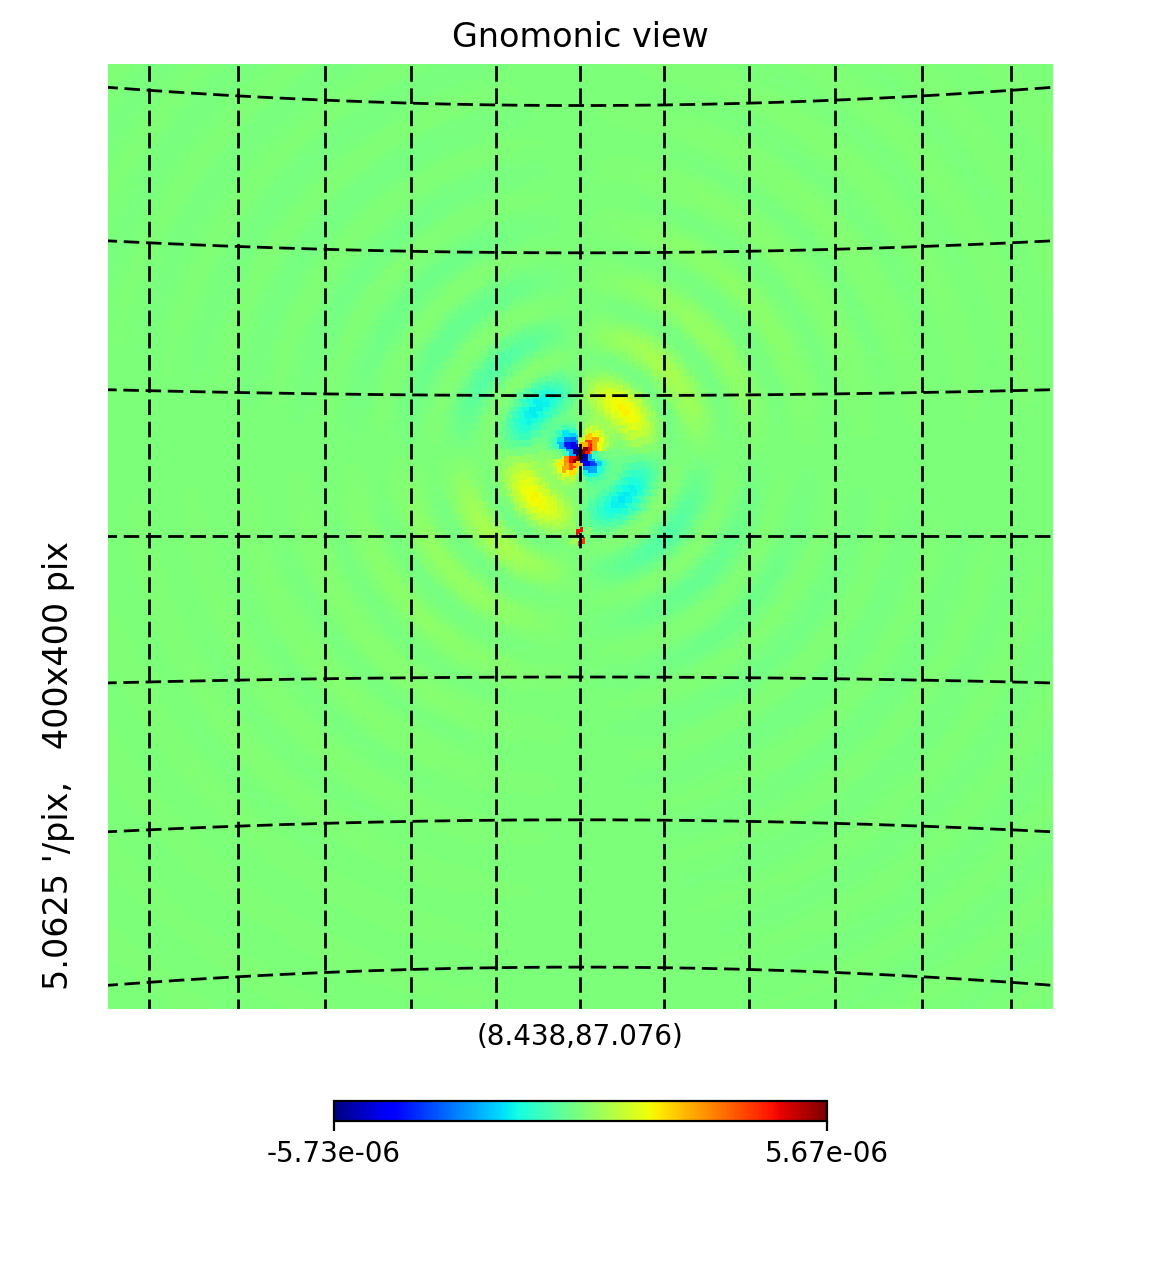

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


In [63]:
h.gnomview((Ir-Jr)-bquq[1],rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule(linestyle="dashed")
h.gnomview((Ii+Ji)-bquq[2],rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule(linestyle="dashed")

<IPython.core.display.Javascript object>


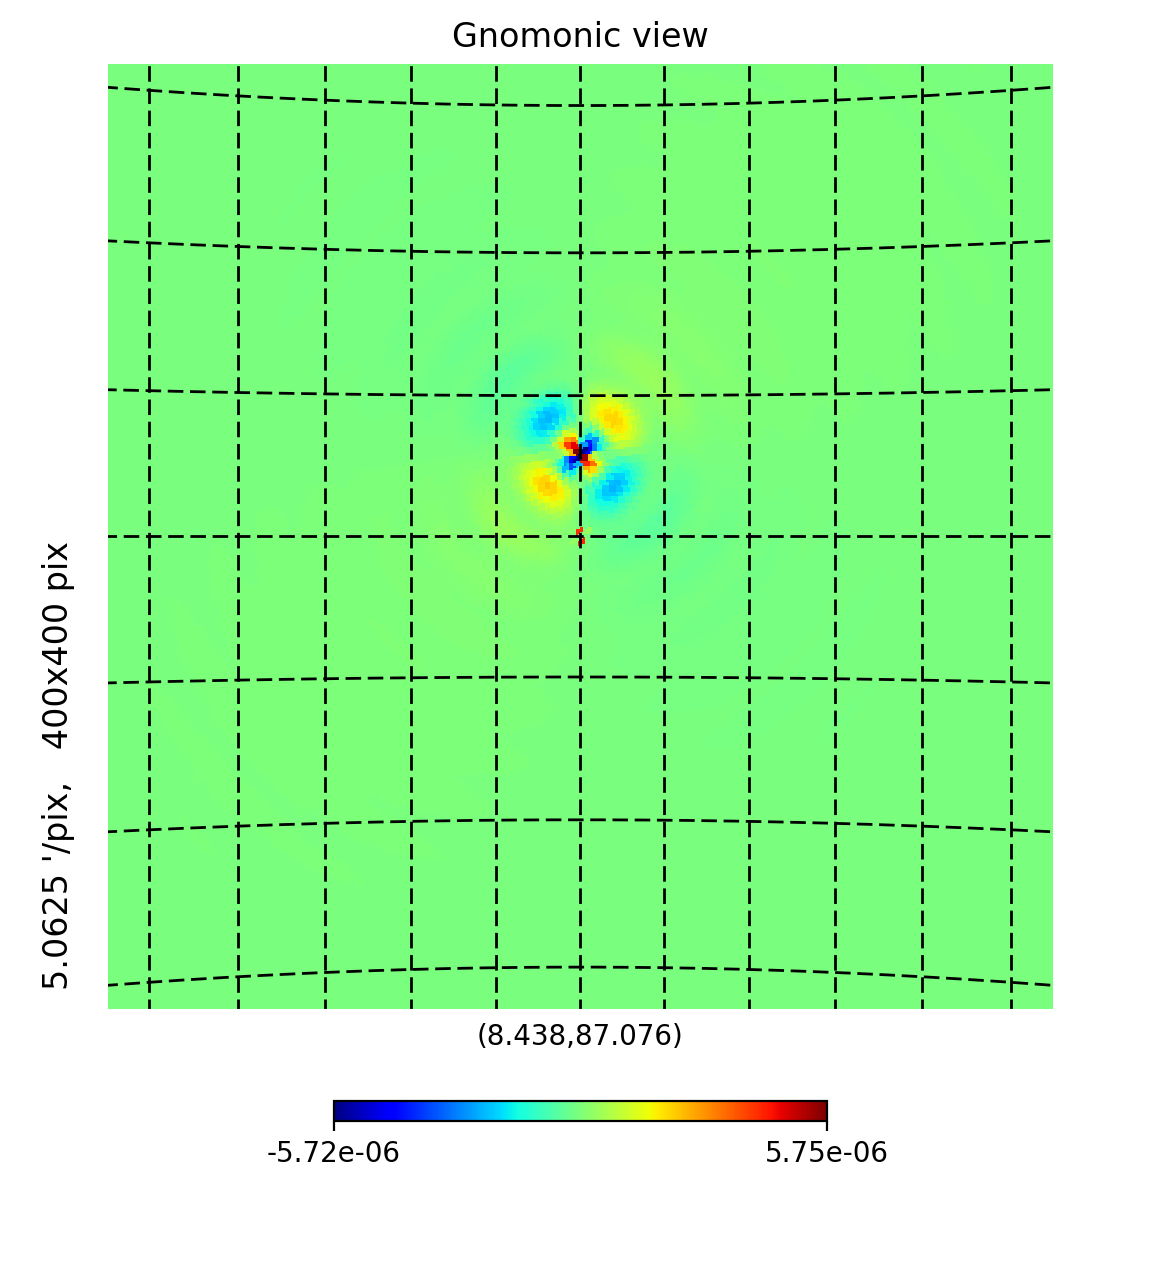

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


<IPython.core.display.Javascript object>


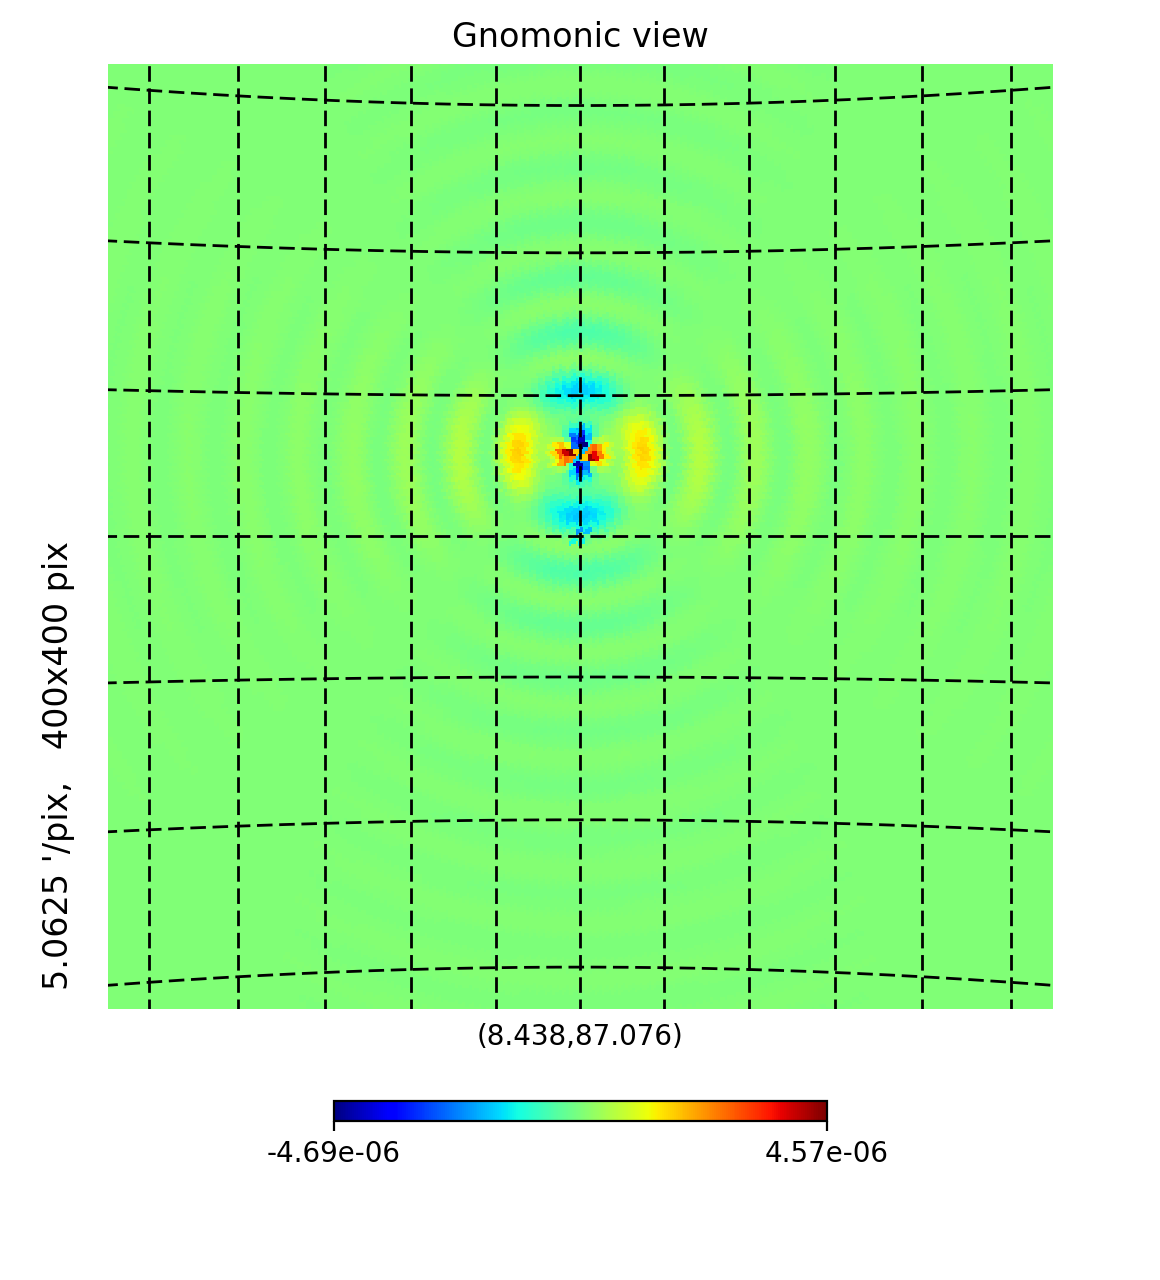

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


In [64]:
h.gnomview((-Ii+Ji)-bquu[1],rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule(linestyle="dashed")
h.gnomview((Ir+Jr)-bquu[2],rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule(linestyle="dashed")

<IPython.core.display.Javascript object>


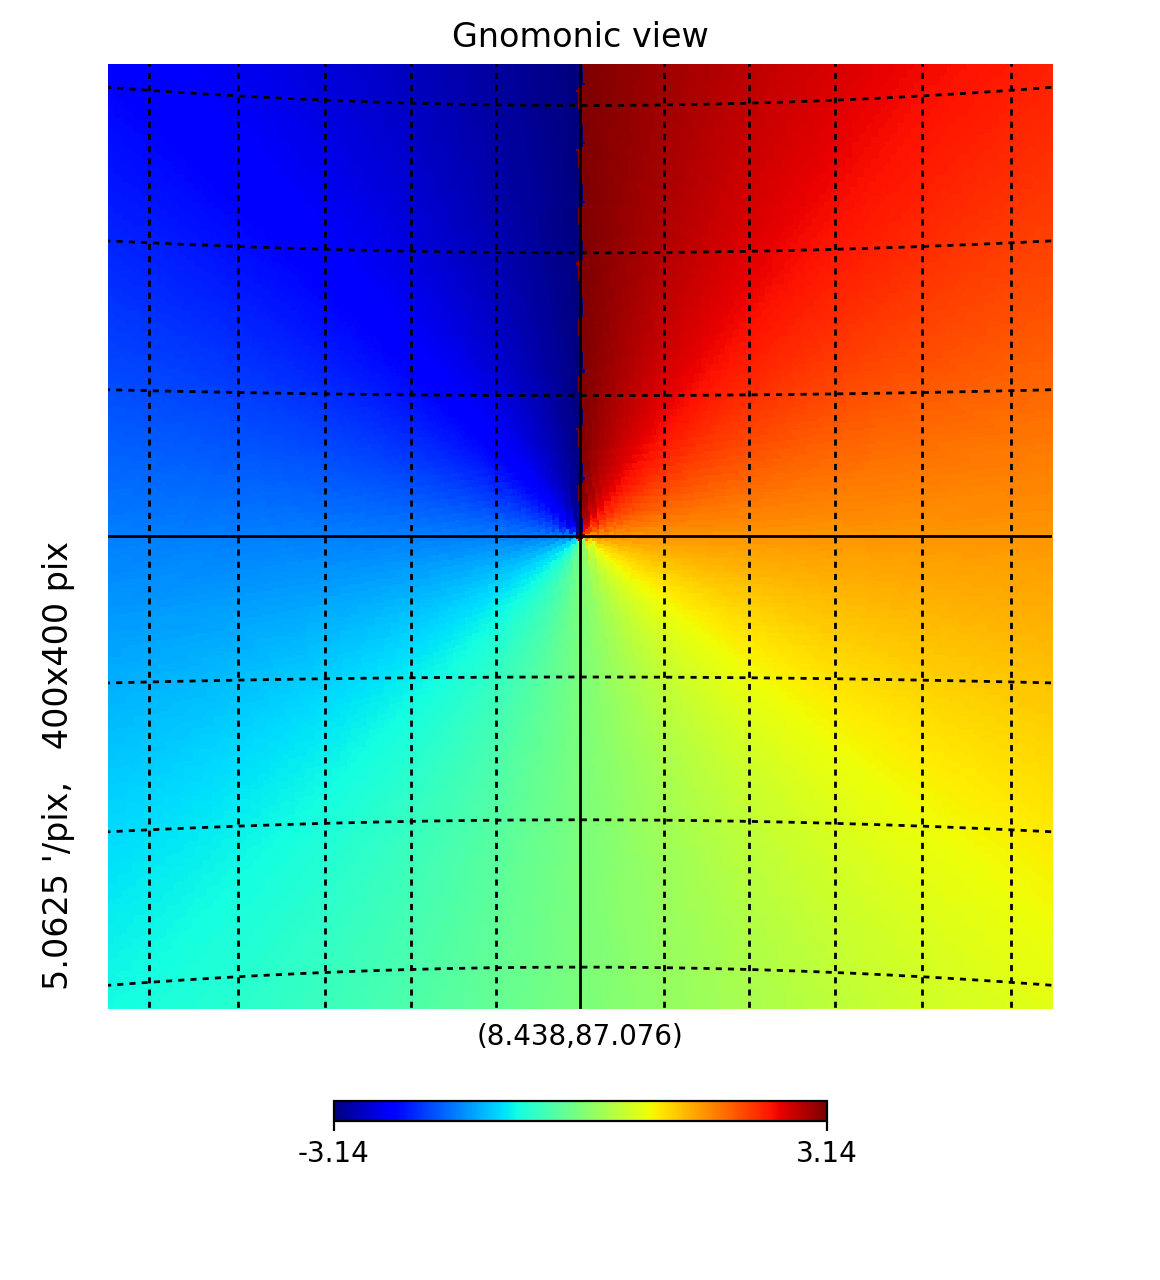

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


<IPython.core.display.Javascript object>


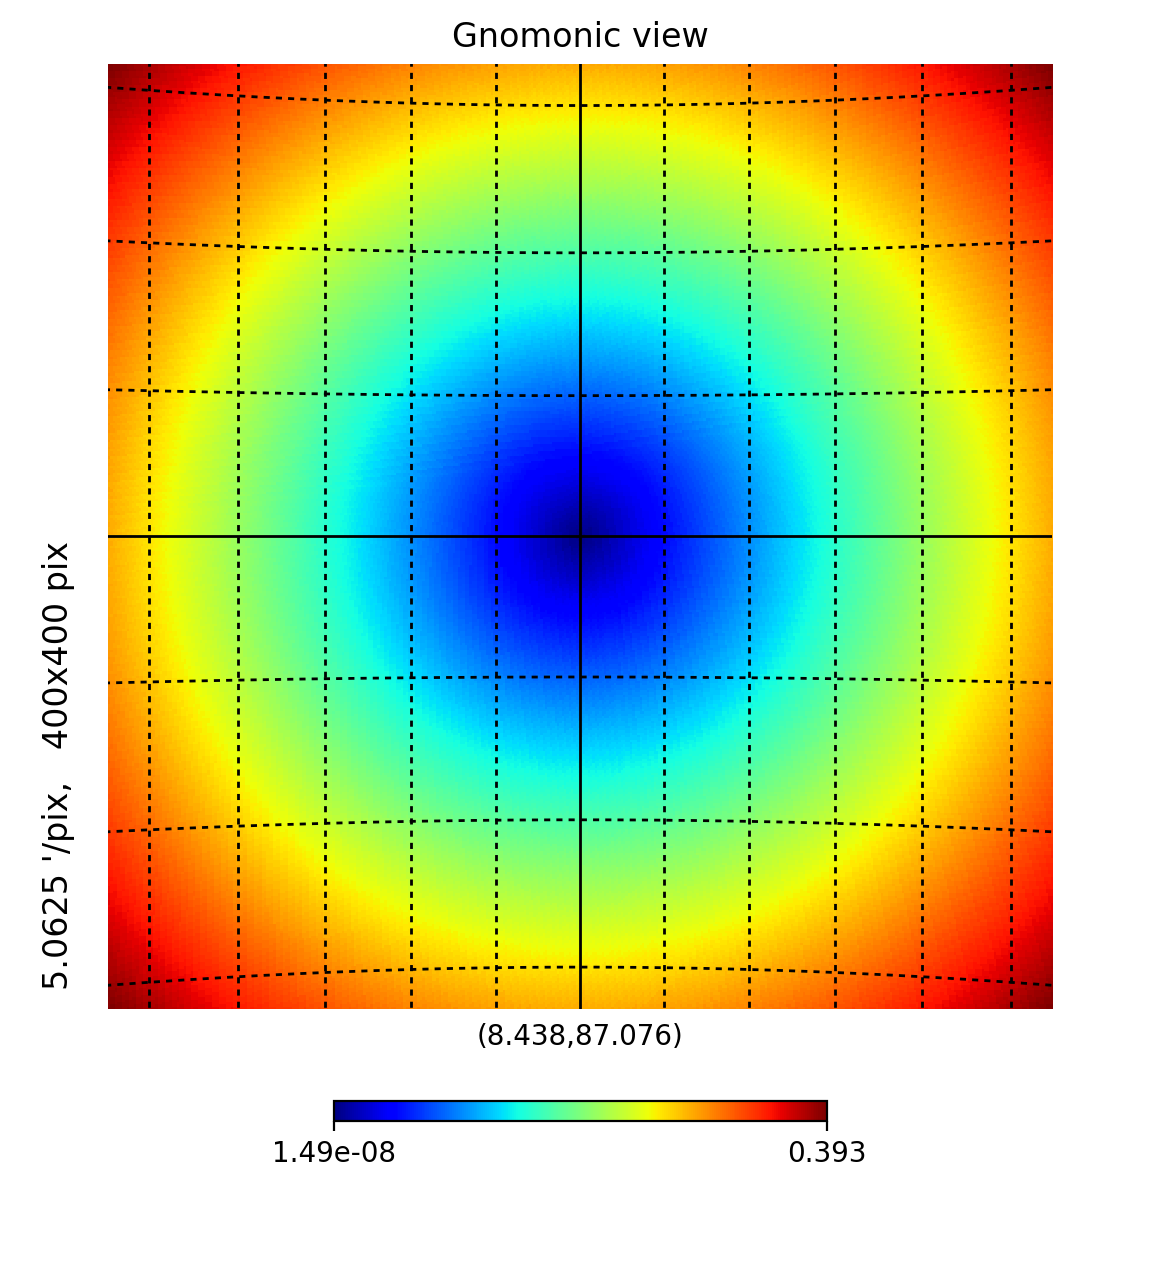

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


<IPython.core.display.Javascript object>


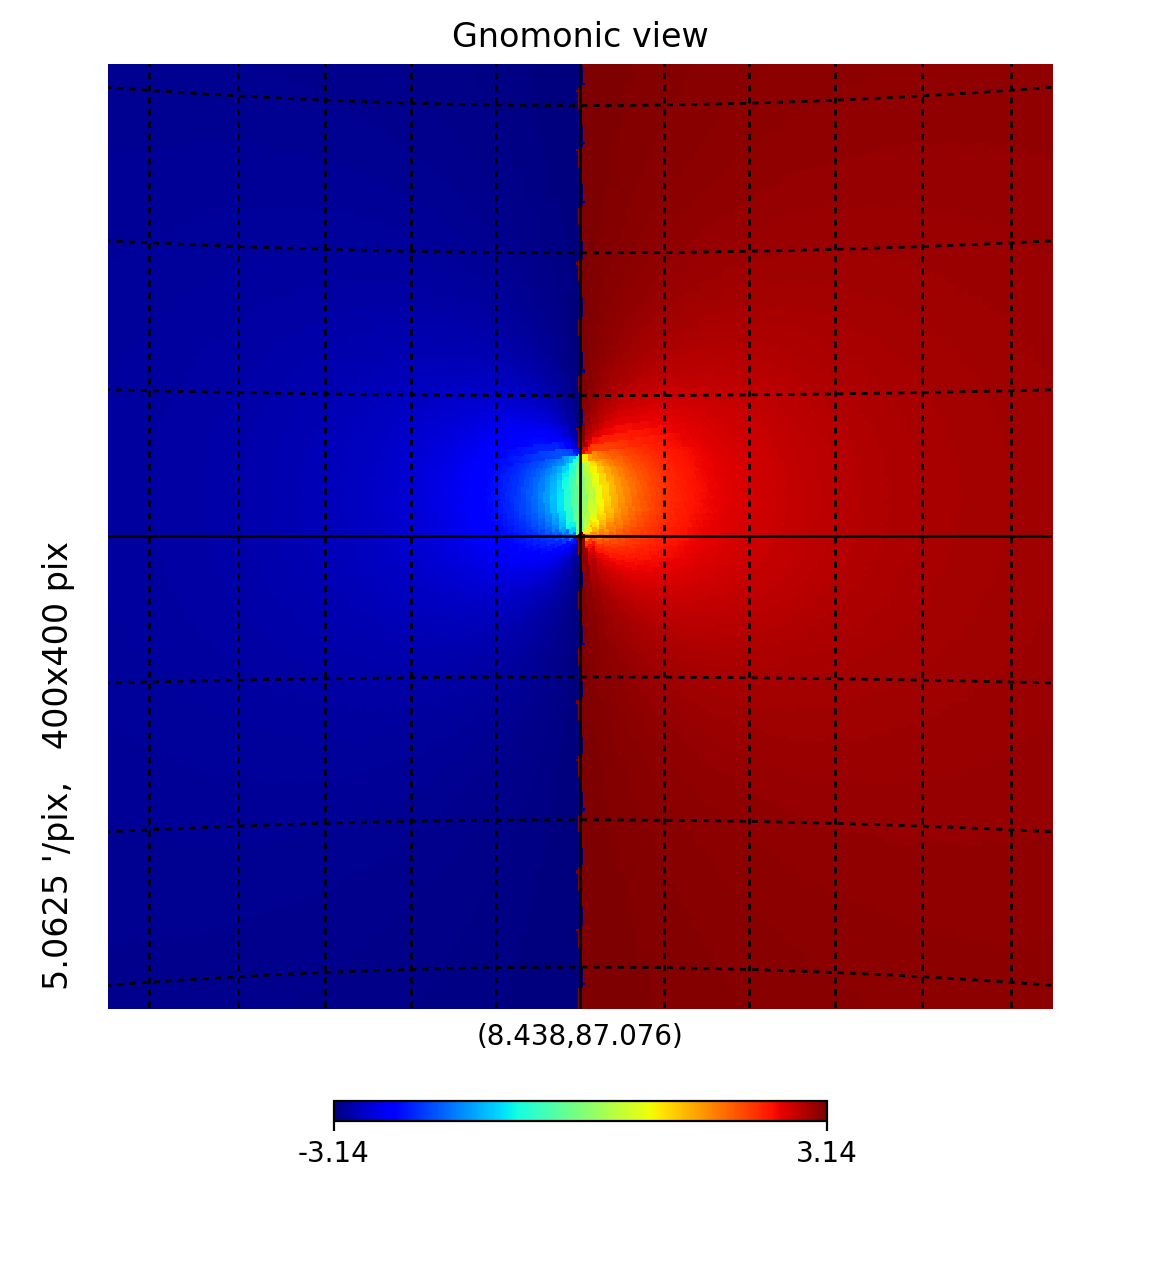

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


In [75]:
h.gnomview(alpha,rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()
#h.gnomview(y.fn_rad_ker(beta),rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()
h.gnomview(beta,rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()
h.gnomview(gamma,rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()

<IPython.core.display.Javascript object>


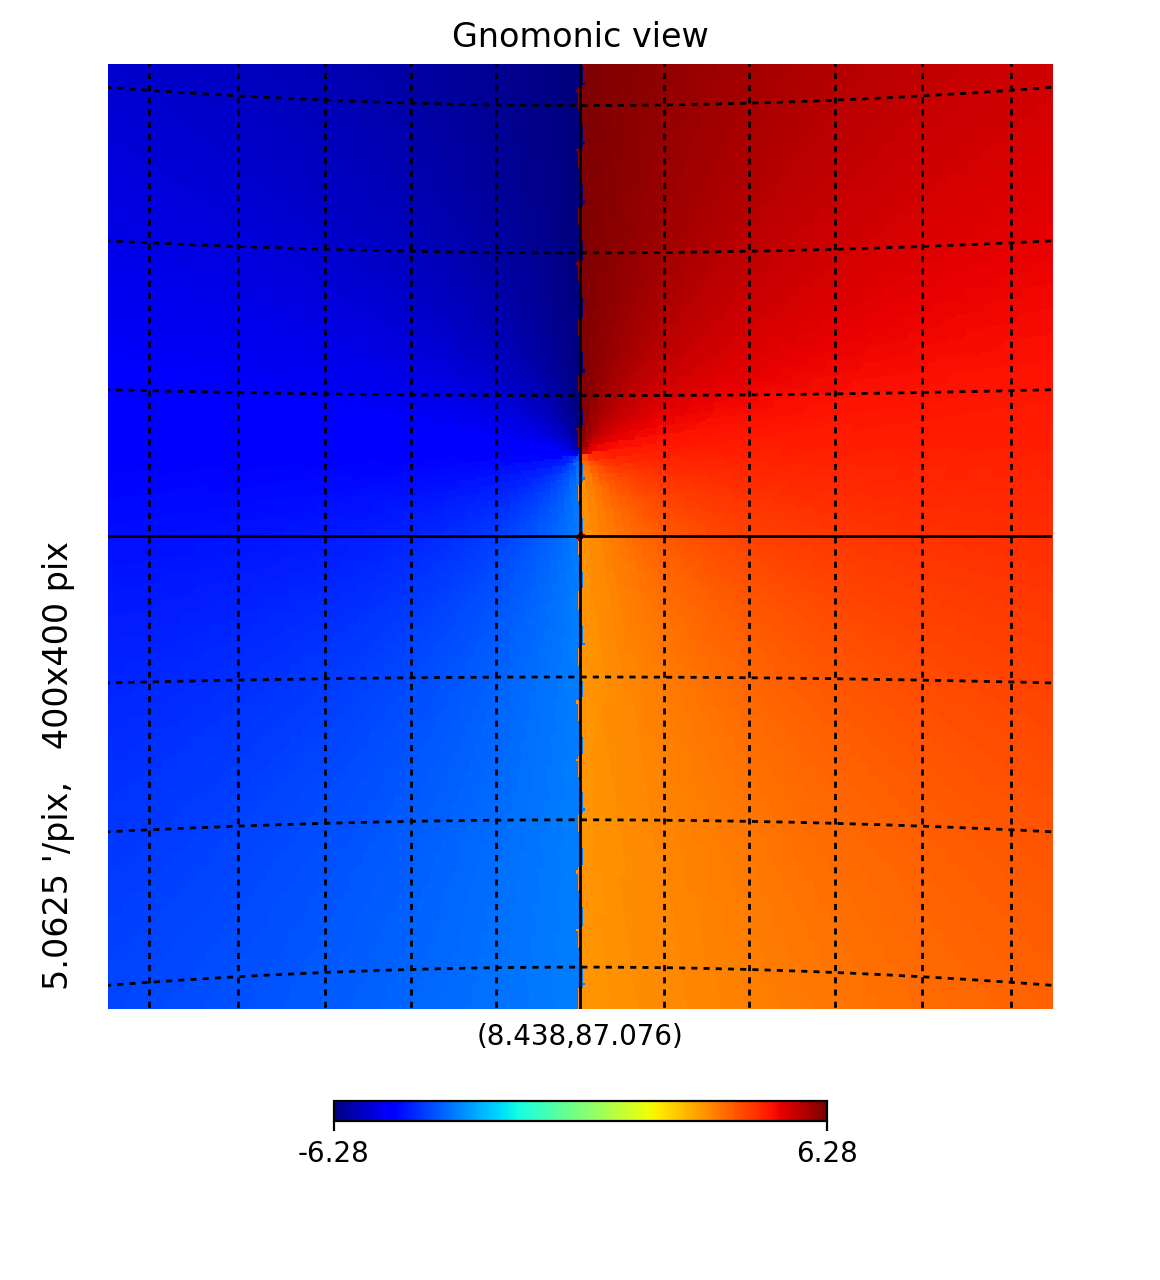

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


In [74]:
h.gnomview(alpha+gamma,rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()